# Renewal theory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from relife import Weibull
from relife.renewal import RenewalProcess

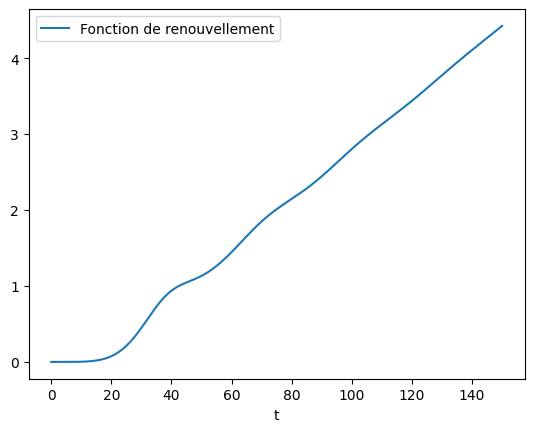

In [2]:
# Choix de la distribution des temps inter-arrivées
distrib = Weibull(5, 0.03)

# Création du processus de renouvellement associé
rp = RenewalProcess(distrib)

# Plot de la fonction de renouvellement qui correspond au nombre moyen de défaillance au cours du temps, ici dans une stratégie run to failure
t = np.linspace(0, 150, num=5000)
plt.plot(t, rp.renewal_function(t), label="Fonction de renouvellement")
plt.xlabel("t")
plt.legend()
plt.show()

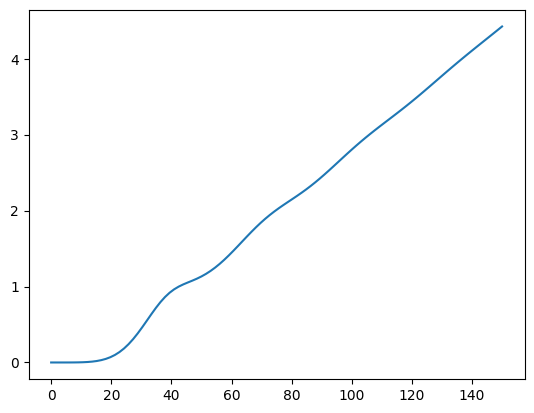

In [3]:
from relife.renewal import renewal_equation_solver


def f(x):
    return distrib.cdf(x)


t = np.linspace(0, 150, num=100)
tm = (t[1:] + t[:-1]) / 2
m = renewal_equation_solver(t, distrib, f)
plt.plot(t, m)
plt.show()

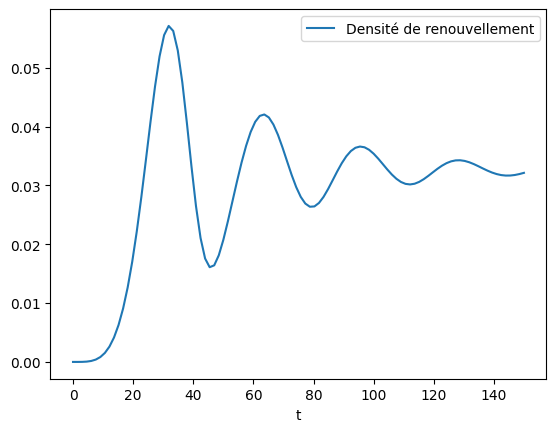

In [4]:
# Plot de la densité de renouvellement qui correspond au nombre moyen de défaillance par unité de temps, au cours du temps.
plt.plot(t, rp.renewal_density(t), label="Densité de renouvellement")
plt.xlabel("t")
plt.legend()
plt.show()

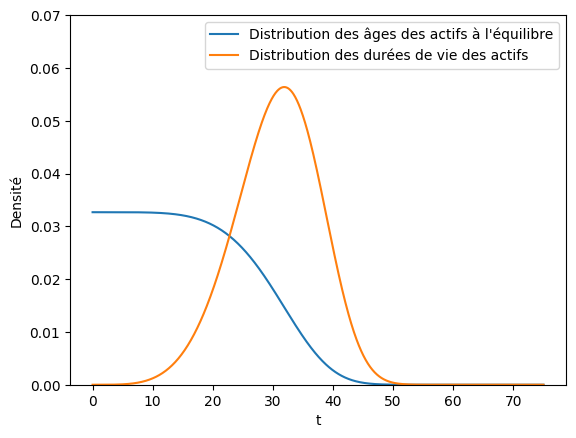

In [5]:
# Calcul de la distribution des âges à l'équilibre. A temps suffisament long, la varariance des durées de vie "étale" les défaillance dans le temps
# ce qui aboutit à une stabilisation du rythme d'apparition des défaillances au cours du temps. Lorsque ce régime stationnaire est atteint,
# la population d'actifs a une distribution d'âge qui ne varie plus au cours du temps : c'est la distribution d'âges à l'équilibre.
from relife.model import EquilibriumDistribution

eq_distrib = EquilibriumDistribution(distrib)

t = np.linspace(0, 75, num=1000)
plt.plot(t, eq_distrib.pdf(t), label="Distribution des âges des actifs à l'équilibre")
plt.plot(t, distrib.pdf(t), label="Distribution des durées de vie des actifs")
plt.xlabel("t")
plt.ylabel("Densité")
plt.legend(loc="upper right")
plt.ylim(0, 0.07)
plt.show()

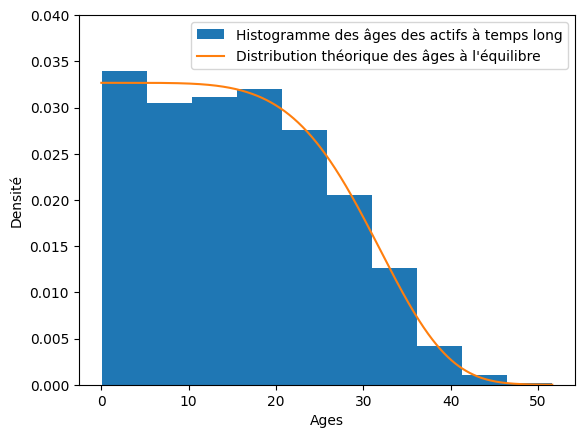

In [6]:
end_time = 1000
nb_samples = 5000

renewal_sample = rp.sample(nb_samples, end_time)
age_eq = np.zeros(nb_samples)

for i in range(nb_samples):
    age_eq[i] = (
        end_time - renewal_sample.event_times[renewal_sample.samples_index == i][-1]
    )

t = np.linspace(0, np.max(age_eq), num=1000)
plt.hist(age_eq, density=True, label="Histogramme des âges des actifs à temps long")
plt.plot(t, eq_distrib.pdf(t), label="Distribution théorique des âges à l'équilibre")
plt.xlabel("Ages")
plt.ylabel("Densité")
plt.ylim((0, 0.04))
plt.legend(loc="upper right")
plt.show()

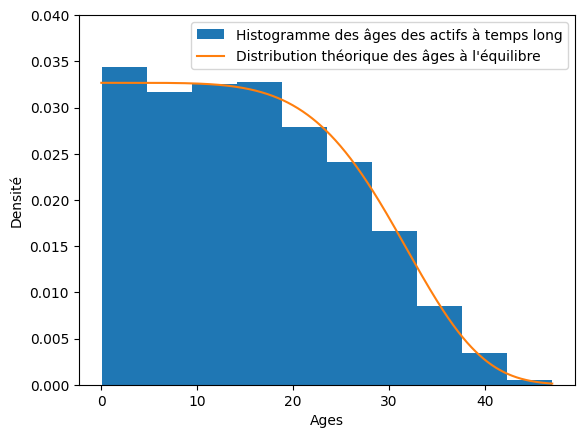

In [7]:
end_time = 1000
nb_samples = 5000

renewal_sample = rp.sample(nb_samples, end_time)
age_eq = np.zeros(nb_samples)

for sample, asset, event_times, lifetimes, events in renewal_sample.iter():
    age_eq[sample] = end_time - event_times[-1]

t = np.linspace(0, np.max(age_eq), num=1000)
plt.hist(age_eq, density=True, label="Histogramme des âges des actifs à temps long")
plt.plot(t, eq_distrib.pdf(t), label="Distribution théorique des âges à l'équilibre")
plt.xlabel("Ages")
plt.ylabel("Densité")
plt.ylim((0, 0.04))
plt.legend(loc="upper right")
plt.show()